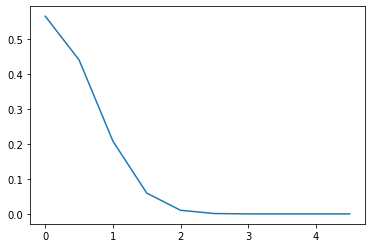

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

x = np.linspace(0, 5, 10, endpoint=False)
y = multivariate_normal.pdf(x, mean=0, cov=0.5)
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.plot(x, y)

In [15]:
import optuna


def objective(trial):
    x = trial.suggest_float("x", -100, 100)
    y = trial.suggest_float("y", -100, 100)
    return x ** 2 + y



sampler = optuna.samplers.CmaEsSampler(
    restart_strategy="ipop",
    inc_popsize=2,
)
study = optuna.create_study(sampler=sampler)
study.optimize(objective, n_trials=200)

/Users/victordesanunes/anaconda3/lib/python3.7/site-packages/optuna/samplers/_cmaes.py:224: ExperimentalWarning: `restart_strategy` option is an experimental feature. The interface can change in the future.
  ExperimentalWarning,
[I 2021-06-12 00:05:21,501] A new study created in memory with name: no-name-02bdcfab-4d9a-4625-900e-bdf23a93845a
[I 2021-06-12 00:05:21,502] Trial 0 finished with value: 6472.878482694649 and parameters: {'x': 80.5862979552733, 'y': -21.272935441435465}. Best is trial 0 with value: 6472.878482694649.
[I 2021-06-12 00:05:21,507] Trial 1 finished with value: 7585.099456495498 and parameters: {'x': -86.96901777749862, 'y': 21.489403312626575}. Best is trial 0 with value: 6472.878482694649.
[I 2021-06-12 00:05:21,509] Trial 2 finished with value: 388.81377247139886 and parameters: {'x': 19.8961570517136, 'y': -7.043292955053997}. Best is trial 2 with value: 388.81377247139886.
[I 2021-06-12 00:05:21,512] Trial 3 finished with value: 28.467049056453817 and paramet

In [24]:
def sphere(trial):
    x = trial.suggest_float("x", -15, 15)
    y = trial.suggest_float("y", -15, 15)
    return x ** 2 + y ** 2


# 2-dimensional box-constrained sphere function
# This function is *biased*; the optimum is (x, y) = (1, 1)
def biased_sphere(trial):
    x = trial.suggest_float("x", -15, 15)
    y = trial.suggest_float("y", -15, 15)
    return (x - 1) ** 2 + (y - 1) ** 2


if __name__ == "__main__":

    # Perform optimization on a source task
    cma = optuna.samplers.CmaEsSampler()
    source_study = optuna.create_study(sampler=cma)
    source_study.optimize(biased_sphere, n_trials=50)
    print(
        f"Best value on the source task: {source_study.best_value},"
        f" (params: {source_study.best_params}\n"
    )

    # Perform optimization on a target task by warm starting CMA-ES
    ws_cma = optuna.samplers.CmaEsSampler(source_trials=source_study.trials)
    target_study = optuna.create_study(sampler=ws_cma)
    target_study.optimize(sphere, n_trials=50)
    print(
        f"Best value on the target task: {target_study.best_value},"
        f" (params: {target_study.best_params}\n"
    )

[I 2021-06-12 00:26:51,361] A new study created in memory with name: no-name-83f928cd-0c18-4aa8-8acc-2e0c8f4b1d56
[I 2021-06-12 00:26:51,364] Trial 0 finished with value: 77.11609510437988 and parameters: {'x': -0.3080509934391369, 'y': -7.683610867775154}. Best is trial 0 with value: 77.11609510437988.
[I 2021-06-12 00:26:51,367] Trial 1 finished with value: 200.24248487451266 and parameters: {'x': -9.748632276543281, 'y': 10.203770371872858}. Best is trial 0 with value: 77.11609510437988.
[I 2021-06-12 00:26:51,370] Trial 2 finished with value: 13.769911599409497 and parameters: {'x': 1.389516643846458, 'y': -2.6902829679546376}. Best is trial 2 with value: 13.769911599409497.
[I 2021-06-12 00:26:51,373] Trial 3 finished with value: 61.822345587885664 and parameters: {'x': -6.325233912474254, 'y': -1.857147828766093}. Best is trial 2 with value: 13.769911599409497.
[I 2021-06-12 00:26:51,375] Trial 4 finished with value: 15.570890851672669 and parameters: {'x': 1.6330082055765898, 'y

Best value on the source task: 0.5833567425848905, (params: {'x': 0.9503940183202507, 'y': 0.23783467071344755}



[I 2021-06-12 00:26:51,801] Trial 49 finished with value: 0.057737952301970055 and parameters: {'x': 0.14279470641597594, 'y': 0.19325533400541703}. Best is trial 48 with value: 0.007786053117182126.


Best value on the target task: 0.007786053117182126, (params: {'x': -0.08166271299262268, 'y': 0.033425356002093114}

